Laboratório de controle - 2023.2\
Turma: T03

Coordenador: Cleison Silva

<br>

Grupo 4:

Andrez Muller Miranda Barreto\
Matrícula: 201833940007

Oséias Dias de Farias\
Matrícula: 201733940002

Thalia Damasceno Barroso\
Matrícula: 201633940040

Hebert Barroso\
Matrícula: 201733940007

<br>

## **<center> Modelagem de sistema por função de transferência pulsada </center>**

### **Objetivo:**

- Encontrar a função de transferência pulsada de uma planta real.


# Contextualização e introdução teórica

O objetivo deste experimento é encontrar uma representação matemática que descreva como um sistema LIT se comporta. Para isso, são utilizados os sinais que são aplicados na entrada e observados na saída do sistema. Como esses sinais são amostrados em intervalos de tempo discretos, é utilizado um modelo de função de transferência discreta, que leva em conta essa característica.

## Resumo teórico sobre Identificação de Sistemas

Uma função de tranferência no domínio $z$ de ordem $N$ pode ser expressa da seguinte forma:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$

Em que $X(z)$ e $Y(z)$  representam a transformada $z$ dos sinais de entada e de saída, respectivamente.

Ao desenvolver os somatórios temos

$$ H(z) = \frac{ b_1z^{-1}+\dotsb+b_{M} z^{-M}}
{1+a_1z^{-1}+\dotsb+a_Nz^{-N}} \tag{2}$$

Ao aplicar a transformada $z$ inversa, obtem-se a equação de diferenças equivalente,

$$ y[k] = -a_1y[k-1] - \dotsb - a_N y[k-N]
+ b_1 x[k - 1] + \dotsb + b_M x[k-N] \tag{3}$$

Observe que se tem um sistema de equações dado por:

$$ \mathbf{y = \Psi \theta} \tag{4}$$

em que $\mathbf{\Psi}$ é a matriz de regressores e definida como segue,  

$$ \mathbf{\Psi} = \begin{bmatrix}
-y[k-1] & \dotsb & -y[k-N] & x[k-1] & \dotsb & x[k-M]
\end{bmatrix} \tag{5}$$

Ao expandir para uma quantidade $N_{a}$ de amostras, a equação (4) tem-se

$$ \begin{bmatrix} y[0]\\ y[1] \\ \vdots\\ y[N_a] \end{bmatrix} = \begin{bmatrix} -y[0-1] & \dotsb & -y[0-N] & x[0-1] & \dotsb & x[0-M]\\-y[1-1] & \dotsb & -y[1-N] &
 x[1-1] & \dotsb & x[1-M]\\ \vdots & \dotsb & \vdots &
\vdots & \dotsb & \vdots \\-y[N_a-1] & \dotsb & -y[N_a-N] &
x[N_a-1] & \dotsb & x[N_a-M]   \end{bmatrix} \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix}$$

A matriz $\Psi$ é denomida de matriz de regressores por ser formada (no porcesso de construção) pelos termos do modelo (equação de diferenças) referentes aos sinais de entrada e de saída atrasados no tempo discreto. 

OBS: o coeficiente $b_0$ é zero, o que indica nenhuma conexão direta entre a entrada e a saída do sistema.

O vetor $\mathbf{\theta}$ é o vetor de coeficientes, definido como segue,

$$ \mathbf{\theta} = \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix} \tag{6}$$

e $\mathbf{y}$ é o vetor de saída no instante de tempo atual (k) . 

Para cada instante de tempo tem-se uma equação distinta, formando um sistema sobredeterminado, o que implica que não há solução exata. Para fins de práticos, uma aproximação é o suficiente. 

Observe que o problema de identificação é formulado de tal forma que os vetores de entrada e saída são conhecidos a partir dos sinais, dessa forma deve-se detrminar o vetor de coeficientes.

<p align='justify'>Para determinar o vetor de coeficientes utiliza-se o sistema de equações para formular um problema de mínimos quadrados, obtendo assim a seguinte expressão:</p>

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{7}$$

<p align='justify'>Após determinar o vetor de coeficientes pode-se substituir os valores obtidos na função de transferência proposta inicialmente e definir o modelo.</p>



## Validação do modelo

<p align='justify'>Tipicamente em Identificação de Sistemas, sempre que levantado um modelo deve-se valida-lo, pois é crucial analisar se o mesmo de fato descreve de maneira aproximada a dinâmica do sistema.</p>

<p align='justify'>Existem diversos métodos para validar um modelo, aqui iremos optar por utilizar uma métrica chamada Erro Quadrático Médio (EQM). Esse método consiste em calcular a média das diferenças ao quadrado entre o sinal observado e o sinal predito, que resulta na seguite expressão:</p>

$$ EQM = \frac{1}{N_a - 1}\sum\limits_{i=0}^{N_a - 1}( y_i - \hat{y}_i)^2 \tag{8}$$

onde $N_a$ é número de amostra dos dados, $y_i$ é a $i$-ésima amostra do sinal observado e $\hat{y}_i$ é a $i$-ésima amostra do sinal predito pelo modelo. No geral quanto menor for o valor do EQM, mais a resposta do modelo se aproxima ao sistema real.

## Passos de execução

Considere a seguinte sequência de passos para resolver o problema de modelagem:

1. Obter os dados de entrada e de saída do sistema;
2. Dividir os dados obtidos em dados para treino e validação;
3. Definir a função de transferência de representará o sistema;
4. Criar a matriz de regressores;
5. Encontrar o vetor de coeficientes pela formulação de mínimos quadrados;
6. Substituir os coeficientes e encontrar a função de tranferência pulsada da planta.
7. Validar o modelo encontrado.

<p align='justify'>Vale destacar para o passo 1, que a entrada aplicada na planta no contexto de Identificação de Sistemas geralmente é um sinal chamado Pseudo Random Binary Sequence (PRBS). Esse sinal tem o propósito de extrair da planta o máximo de informação sobre a dinâmica de transitórios. </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from sklearn.metrics import mean_squared_error


import scienceplots

%config InlineBackend.figure_format="retina"
plt.style.use(["science", "notebook"])

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Passo 1

Foi realizado ensaios para se obter os sinais de entrada e saída do sistema.

In [2]:
dados_prbs_malha_aberta = pd.read_csv("prbs_ma_7_5_v2.csv", sep=";", header = None).values
dados_prbs_malha_aberta

array([[0.000e+00, 7.500e+00, 0.000e+00],
       [2.000e-02, 7.500e+00, 0.000e+00],
       [4.000e-02, 7.500e+00, 1.900e-01],
       ...,
       [2.042e+01, 8.500e+00, 2.470e+00],
       [2.044e+01, 8.500e+00, 2.490e+00],
       [2.046e+01, 8.500e+00, 2.500e+00]])


Periodo de Amostragem: 0.02


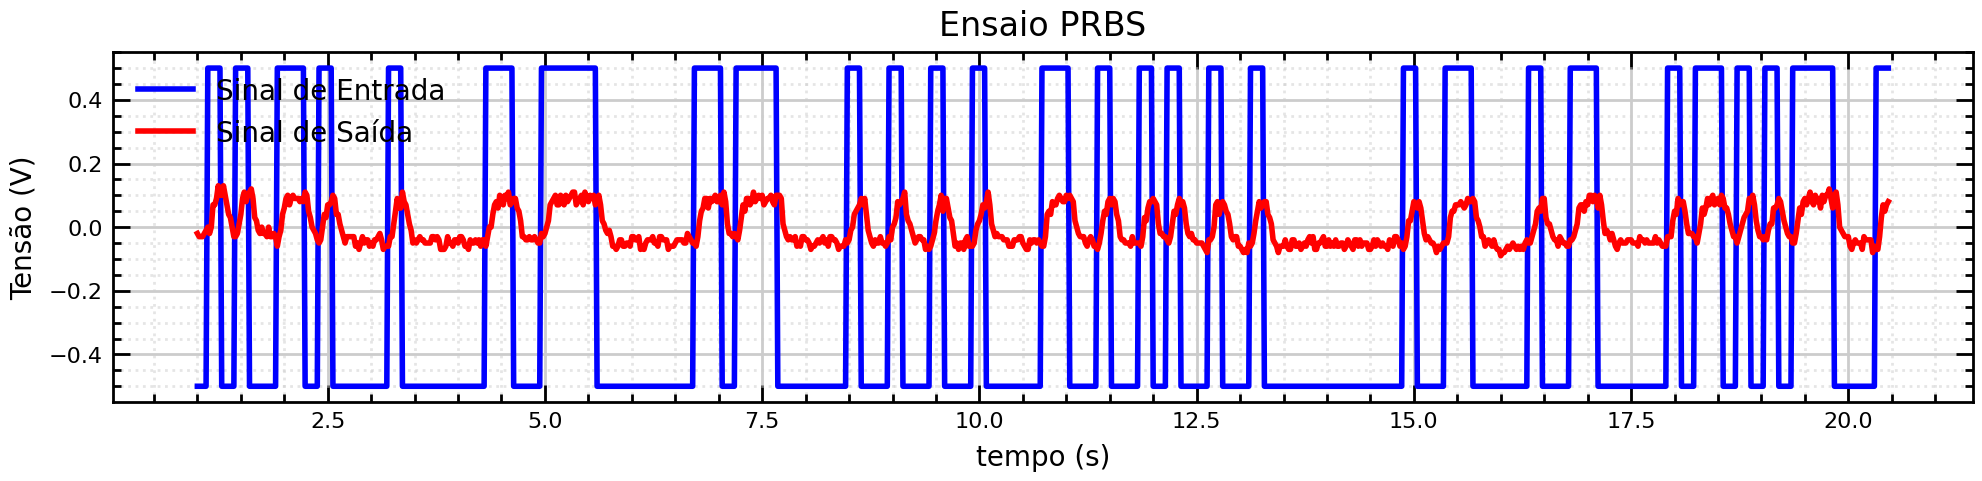

In [3]:
# Dados
tempo = np.array(dados_prbs_malha_aberta[:,0])
sinal_entrada  = np.array(dados_prbs_malha_aberta[:,1])
sinal_saida = np.array(dados_prbs_malha_aberta[:,2])

Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


plt.figure(figsize=(12, 5))
plt.subplot(211)
plt.plot(tempo[50:], sinal_entrada[50:] - 8, c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[50:], sinal_saida[50:] - (np.mean(sinal_saida[50:])),
         c = 'r', label = "Sinal de Saída")

plt. title('Ensaio PRBS', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

# Exercício 01

Responda:

1. Qual é a excursão em amplitude dos sinais de entrada (sinal PRBS) e de saída?
2. Qual é o valor médio dos sinais de entrada e de saída ?
3. Por quê os sinais de entrada e de saída são diferentes ? Quais são as semalhanças ?
4. Como você descreveria o comportamento do sistema com base na resposta para entrada PRBS ?  

# Passo 2

Os dados são dividimos em dois subconjuntos: o de treino e de teste conforme o código abaixo.

In [4]:
# Vetores de tempo
intervalo_train = np.arange(50, 200)
intervalo_test = np.arange(200, 500)

t_train, t_test = (dados_prbs_malha_aberta[intervalo_train, 0],
                   dados_prbs_malha_aberta[intervalo_test, 0])

# Vetores da entrada
xtrain, xtest = (dados_prbs_malha_aberta[intervalo_train, 1],
                 dados_prbs_malha_aberta[intervalo_test, 1])

# Vetores da saída
ytrain, ytest = (dados_prbs_malha_aberta[intervalo_train, 2],
                 dados_prbs_malha_aberta[intervalo_test, 2])

# Passo 3

Nesse passo deve-se determinar a ordem da função de transferência pulsada. Uma seleção arbitrária seria a primeira ordem, substituindo o valor de $N = 1$ na Eq. 1 obtem-se:

$$ H(z) = \frac{b_0+b_1z^{-1}}
{1+a_1z^{-1}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}}
{1+a_1z^{-1}} \tag{10}$$

expressando na forma de equação de diferenças:

$$ y[n] = -a_1y[n-1] + b_1x[n-1] \tag{11}$$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

# Exercício 2

1. Determine a função de transferência para o caso de se obter um sistema de segunda ordem.
2. Com base na função de transferência do item 1, determine a equação de diferenças do sistema.

# Passo 4

A matriz de regressores pode ser montada através do código abaixo.

In [5]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], xtrain[k-1]]).T

# Passo 5

Podemos expressar a Equação 7 em forma de código e calcular o vetor de coeficientes conforme segue.

In [6]:
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo 6

Sistema de Primeira Ordem

Substituindo os coeficientes na Eq. 10 obtemos a funções de transferência pulsado do sistema conforme o código abaixo.

In [8]:
# Separando os coeficientes
a1, b1 = teta
# a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1]
# B = [b1, b2]

# Denominador de H(z)
A = [1, a1]
# A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('\nPeríodo de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z):\n")
Gz


Período de Amostragem: 0.019999999999999657

 G(z):



TransferFunction(array([0.03279405]), array([ 1.        , -0.89421143]), 0.019999999999999657)

# Passo 7

<p align='justify'> Por ultimo, mas não menos importante, deve-se validar a função de transferência encontrada com os dados de teste. Para isso iremos utilizar a Eq. 8 para calcular o erro quadrático médio. A biblioteca scikit-learn já possui uma função para realizar esse cálculo conforme o código abaixo. Como observado o valor do erro foi relativamente baixo, o que nos mostra que o modelo está razoável.</p>

In [11]:
# Respostas da função de transferência para a entrada de validação.
y_hat = ct.forced_response(Gz, U=xtest)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(ytest[50:], y_hat[50:])
print('\nErro médio quadrático: %.6f\n' % MSE)


Erro médio quadrático: 0.002789



<p align='justify'>Outra forma de visualizar se o modelo está satisfatório é comparando o gráfico dos valores preditos com os observados. Como é visto no gráfico abaixo, o modelo é satisfatório em alguns momentos, mas em outros fica distante o valor observado, uma forma de tentar melhorar o modelo seria aumentando a ordem a função de transfência.</p>

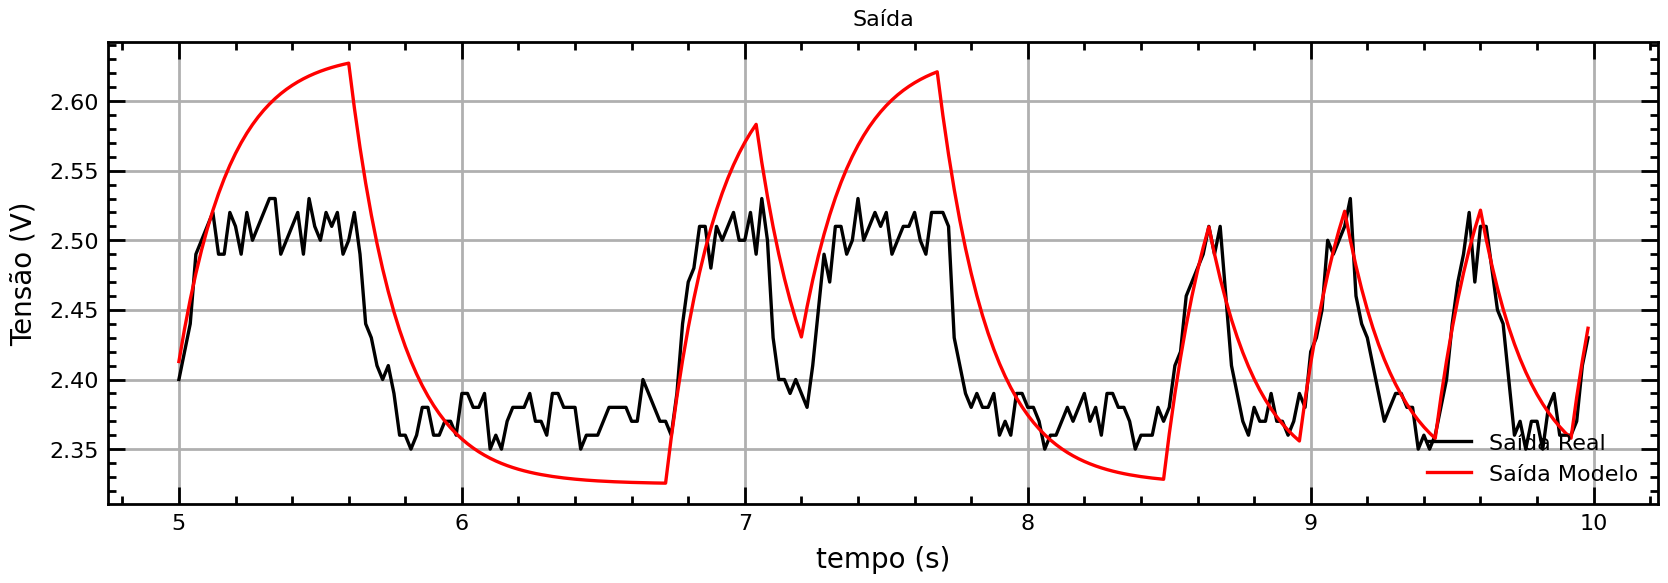

In [12]:
plt.figure(figsize=(10,3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()